In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/HR_comma_sep.csv")
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df_selected = df[['satisfaction_level', 'salary', 'promotion_last_5years', 'average_montly_hours','left']]
display(df_selected.head())

,satisfaction_level,salary,promotion_last_5years,average_montly_hours,left
0,0.38,low,0,157,1
1,0.80,medium,0,262,1
2,0.11,medium,0,272,1
3,0.72,low,0,223,1
4,0.37,low,0,159,1


In [ ]:
if 'salary' in df_selected.columns:
  df_selected = pd.get_dummies(df_selected, columns=['salary'], drop_first=False).astype(int)
display(df_selected.head())

,satisfaction_level,promotion_last_5years,average_montly_hours,left,salary_high,salary_low,salary_medium
0,0,0,157,1,0,1,0
1,0,0,262,1,0,0,1
2,0,0,272,1,0,0,1
3,0,0,223,1,0,1,0
4,0,0,159,1,0,1,0


In [ ]:
X = df_selected.drop('left', axis=1)
y = df_selected['left']
display(X.head())
display(y.head())

,satisfaction_level,promotion_last_5years,average_montly_hours,salary_high,salary_low,salary_medium
0,0,0,157,0,1,0
1,0,0,262,0,0,1
2,0,0,272,0,0,1
3,0,0,223,0,1,0
4,0,0,159,0,1,0


,left
0,1
1,1
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
model.predict_proba(X_test)

array([[0.77240746, 0.22759254],
       [0.7287401 , 0.2712599 ],
       [0.69112245, 0.30887755],
       ...,
       [0.79374955, 0.20625045],
       [0.73572159, 0.26427841],
       [0.75286688, 0.24713312]])

In [ ]:
model.score(X_test,y_test)

0.7646666666666667

In [ ]:
X_test

,satisfaction_level,promotion_last_5years,average_montly_hours,salary_high,salary_low,salary_medium
6723,0,0,226,0,0,1
6473,0,0,166,0,1,0
4679,0,0,214,0,1,0
862,0,0,154,0,1,0
7286,0,0,254,0,1,0
...,...,...,...,...,...,...
3297,0,0,143,0,0,1
14113,0,0,255,0,0,1
5514,0,0,193,0,0,1
9939,0,0,278,0,0,1


In [ ]:
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.coef_

array([[-2.54394112, -1.27566695,  0.00380974, -1.53022363,  0.2555521 ,
        -0.20674799]])

In [ ]:
model.intercept_

array([-1.87620921])

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age):
    z = 0.042 * age - 1.53
    return sigmoid(z)

In [ ]:

specific_input = [[0.5, 0, 180, False, True, False]] # Example: satisfaction_level=0.5, promotion_last_5years=0, average_montly_hours=180, salary=low

# Make a prediction
predicted_output = model.predict(specific_input)

print(f"The predicted output for the specific input is: {predicted_output}")

The predicted output for the specific input is: [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.4f}")

Model accuracy: 0.7647


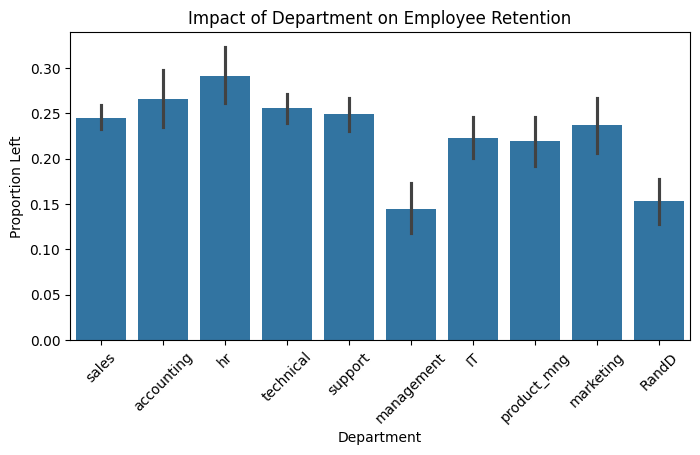

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='Department', y='left', data=df)
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Proportion Left')
plt.xticks(rotation=45)
plt.show()

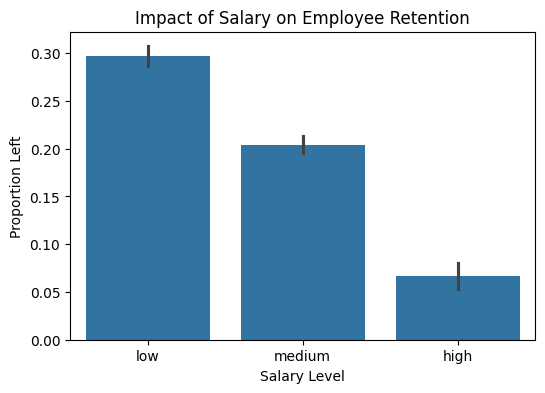

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='salary', y='left', data=df)
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Proportion Left')
plt.show()